# Tutorial 1 -- Linear Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LinearRegression

## 1. Single variable

In [4]:
df1 = pd.read_csv("1-home-price-train.csv")
df1

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


Text(0, 0.5, 'Price (USD)')

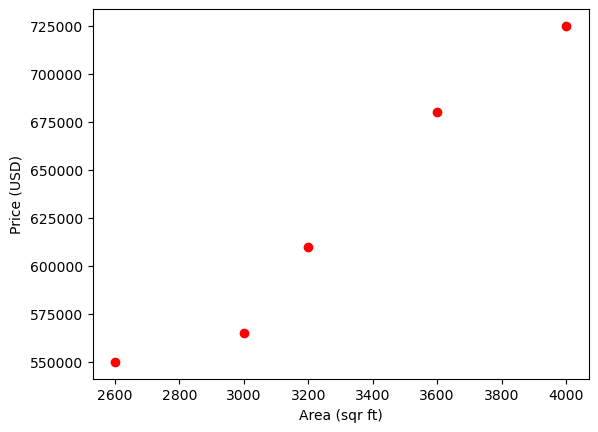

In [5]:
%matplotlib inline

plt.scatter(df1.area, df1.price, color="red")
plt.xlabel("Area (sqr ft)")
plt.ylabel("Price (USD)")

In [6]:
reg = LinearRegression().fit(df1[["area"]].values, df1.price)

In [7]:
reg.coef_

array([135.78767123])

In [8]:
reg.intercept_

180616.43835616432

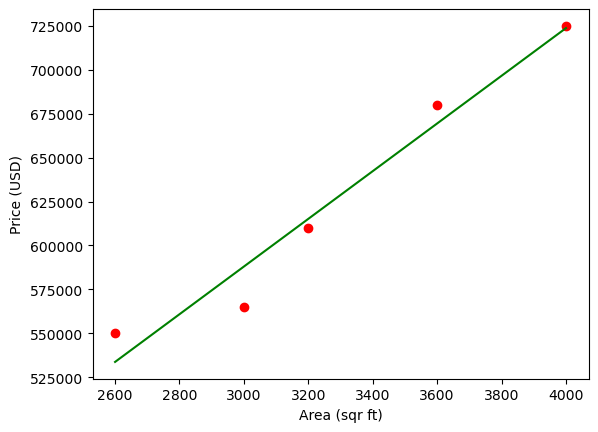

In [9]:
%matplotlib inline
plt.xlabel("Area (sqr ft)")
plt.ylabel("Price (USD)")
plt.scatter(df1.area, df1.price, color="red")
plt.plot(df1.area, reg.predict(df1[["area"]].values), color="g")

In [10]:
target_area = 3300
prediction_for_target_area = reg.predict(np.array([[target_area]]))[0]
print(prediction_for_target_area)

628715.7534246575


In [11]:
135.78767123*3300 + 180616.43835616432

628715.7534151643

In [12]:
df2 = pd.read_csv("1-home-price-predict.csv")
df2.tail(3)

,area
6,4000
7,4500
8,5000


In [13]:
reg.predict(df2[["area"]]) # get a warning like "UserWarning: X has feature names, but LinearRegression was fitted without feature names warnings.warn"

/Users/yonglei/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([316404.10958904, 384297.94520548, 452191.78082192, 520085.61643836,
       587979.45205479, 655873.28767123, 723767.12328767, 791660.95890411,
       859554.79452055])

In [14]:
new_prediction = reg.predict(df2[["area"]].values)
new_prediction

array([316404.10958904, 384297.94520548, 452191.78082192, 520085.61643836,
       587979.45205479, 655873.28767123, 723767.12328767, 791660.95890411,
       859554.79452055])

In [15]:
df2["prices"] = new_prediction
df2

,area,prices
0,1000,316404.109589
1,1500,384297.945205
2,2000,452191.780822
3,2500,520085.616438
4,3000,587979.452055
5,3500,655873.287671
6,4000,723767.123288
7,4500,791660.958904
8,5000,859554.794521


In [16]:
# df2.to_csv("home_price_predict.csv", index=False)

## 2. Multivariate Regression

In [17]:
df3 = pd.read_csv("2-home-price-train.csv")
df3.head(3)

,area,bedroom,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000


In [18]:
# price = m1*area + m2*bedrooms + m3*age + b
# price is a `dependent variable`
# area, bedrooms, and age are `independent variables (features)`
# m1, m2, and m3 are coefficients, and b is the intercept
#
# y = m1x1 + m2x2 + m3x3 + b

In [19]:
# We need two steps:
# - data processing: handle NA values
# - linear regression using multiple variables

In [20]:
import math
median_bedroom = math.floor(df3.bedroom.median())
median_bedroom

3

In [21]:
df3.bedroom.fillna(median_bedroom) # process the NA value

0    3.0
1    4.0
2    3.0
3    3.0
4    5.0
Name: bedroom, dtype: float64

In [22]:
df3.bedroom = df3.bedroom.fillna(median_bedroom)
df3

,area,bedroom,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [23]:
reg = LinearRegression().fit(df3[["area", "bedroom", "age"]], df3.price)

In [24]:
reg.coef_

array([   137.25, -26025.  ,  -6825.  ])

In [25]:
reg.intercept_

383725.0

In [26]:
# new prediction 1
target = 3000, 3, 40
price = reg.predict(np.array([target]))[0]
price

/Users/yonglei/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


444399.9999999999

In [27]:
# new prediction 2

price = reg.predict([[2500, 4, 5]])[0]
price

/Users/yonglei/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


588625.0

In [35]:
#x = np.array([['area', 'bedroom', 'age'], [2500, 4, 5]])
#print(x)
#price = reg.predict(x.values)[0]

[['area' 'bedroom' 'age']
 ['2500' '4' '5']]


AttributeError: 'numpy.ndarray' object has no attribute 'values'

## 3. Data for training and validating

If you have enough data, you can use a large amount of data for training (say 70%) and the left data (30%) for validation.


In [37]:
df3 = pd.read_csv("3-car-model-co2.csv")
df3.head(5)

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [39]:
# make a list of the independent values and call this variable X.
# Put the dependent values in a variable called y.

X = df3[["Weight", "Volume"]]
Y = df3[["CO2"]]

In [40]:
reg = LinearRegression()

LinearRegression()

In [41]:
reg.fit(X, Y)

LinearRegression()

In [57]:
print(reg.coef_, '\n')
print(reg.intercept_)

[[0.00755095 0.00780526]] 

[79.69471929]


In [54]:
test_data = np.array([2300, 1200]) # weight and volumn
predict_co2 = reg.predict([test_data])[0]
print(predict_co2)

[106.42820705]


/Users/yonglei/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
